# Part II - Loan Data from Prosper
## by Tuancnh


## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook (i.e., an executive summary). This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights listed here should match those documented at the conclusion of the exploratory analysis notebook. 


## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [14]:
loan_new_df = df[['ListingCreationDate', 'LoanOriginalAmount', 'LoanStatus', 'ListingCategory (numeric)', 'BorrowerState', 'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome',
             'Term', 'EmploymentStatus', 'MonthlyLoanPayment','ProsperRating (Alpha)']]

# High-level overview of data shape and composition
print(loan_new_df.shape)
print(loan_new_df.info())
loan_new_df = loan_new_df.drop_duplicates();
loan_new_df['ListingCategory (TEXT)'] = loan_new_df['ListingCategory (numeric)']
loan_new_df['ListingCategory (numeric)'] = loan_new_df['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})

loan_new_df['ListingCategory (numeric)'].dtype

(113937, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   LoanOriginalAmount         113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   BorrowerState              108422 non-null  object 
 5   BorrowerAPR                113912 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  MonthlyLoanPayment         113937 non-null  float64
 11  ProsperRating (Alpha)      84853 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 10.4+ MB
None


dtype('O')

## (Visualization 1)

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

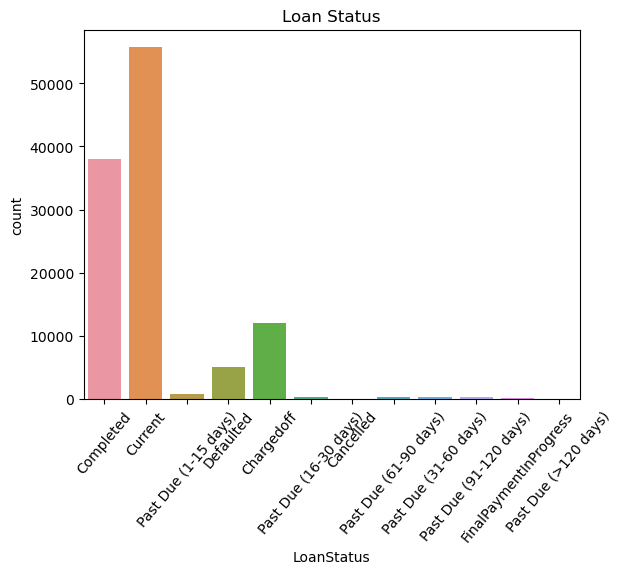

In [15]:
plt.xticks(rotation=50)
sb.countplot(data = loan_new_df, x = 'LoanStatus');
plt.title('Loan Status');

The majority of loan status are current

## Distribution of Borrower APR

> A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36

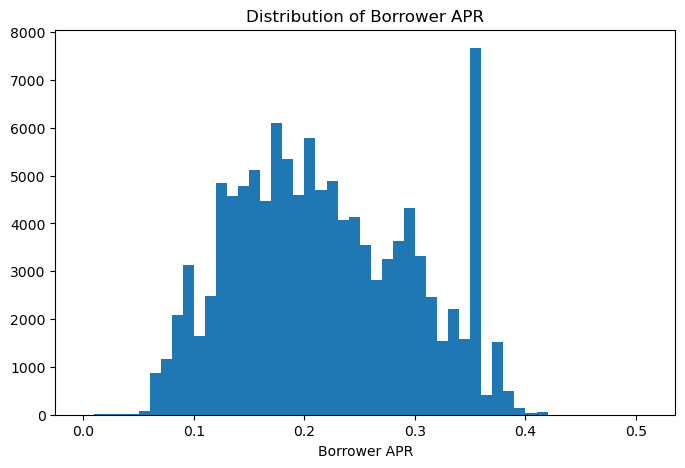

In [18]:
bins = np.arange(0, loan_new_df.BorrowerAPR.max(), 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

## Loan Status and Loan Amount

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

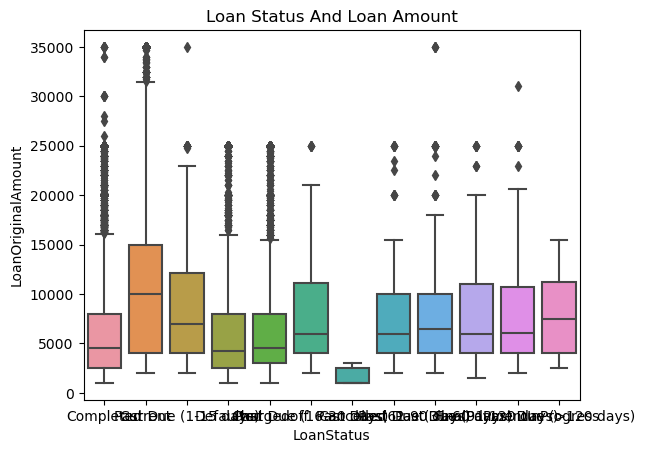

In [19]:
sb.boxplot(data = loan_new_df, x = 'LoanStatus', y = 'LoanOriginalAmount');
plt.title('Loan Status And Loan Amount');

## Term

There are only 3 loan terms, and the majority of loan term is for the 36 months

In [20]:
loan_new_df['Term'].value_counts()

Term
36    87224
60    24228
12     1614
Name: count, dtype: int64

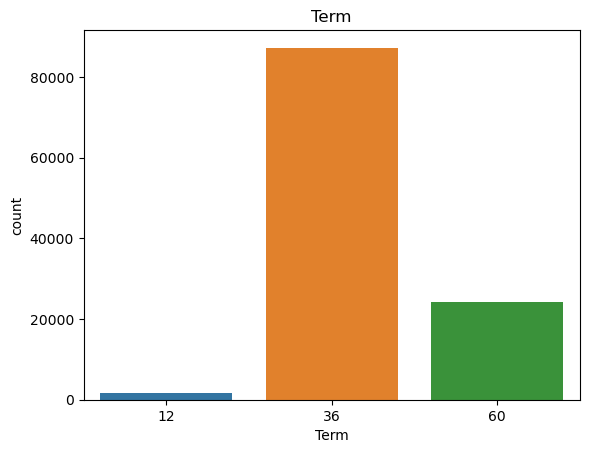

In [22]:
sb.countplot(data = loan_new_df, x = 'Term');
plt.title('Term');

## the relation ship Employment Status Vs Term

The Full time employed have a longer term loan of 36

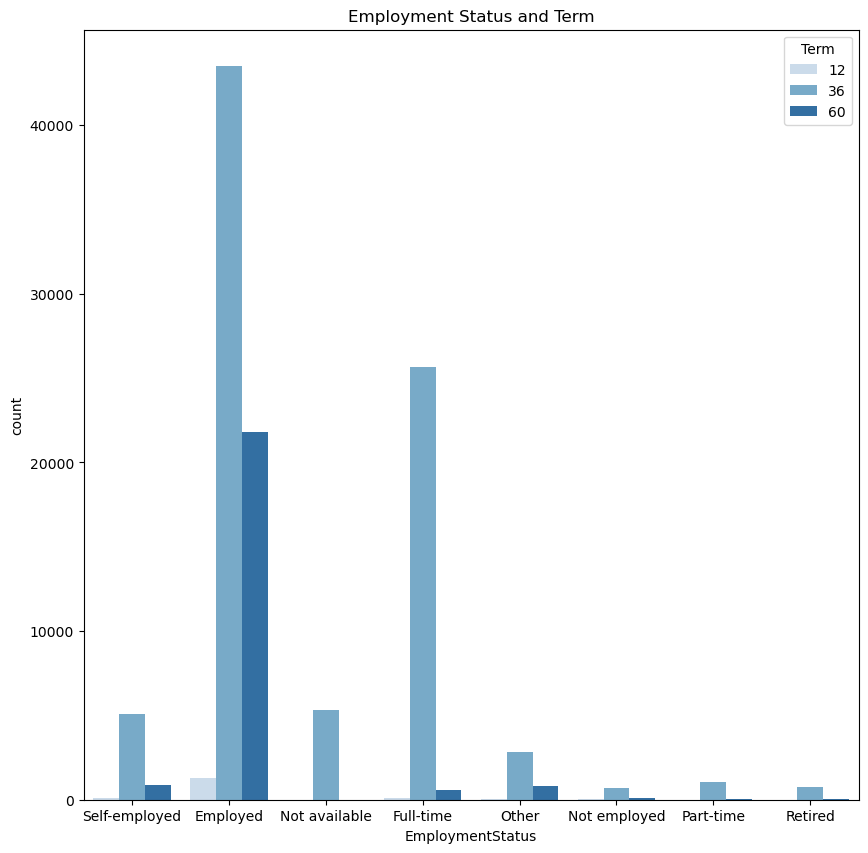

In [24]:
plt.figure(figsize = [10, 10])
sb.countplot(data = loan_new_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');
plt.title('Employment Status and Term');

## The relationship between Borrower APR and Loan Amount

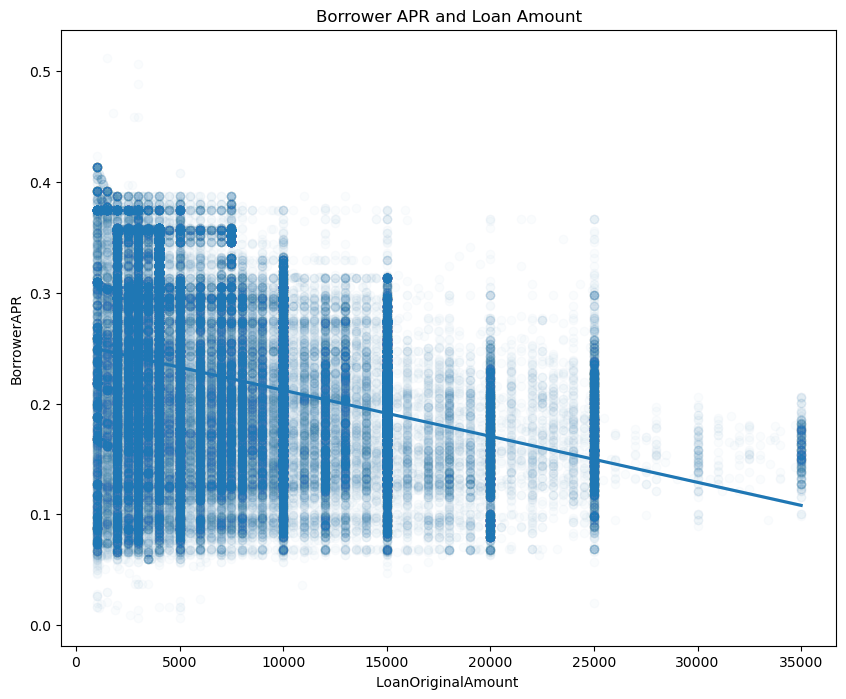

In [25]:
plt.figure(figsize = [10, 5])

sb.regplot(data = loan_new_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha': 1/50})
plt.xlabel('LoanOriginalAmount ')
plt.ylabel('BorrowerAPR')
plt.title('Borrower APR and Loan Amount');

In [26]:
!jupyter nbconvert Part_II_explanatory_template.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
